# Import necessary libraries

In [0]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.metrics import confusion_matrix

# Download dataset

In [0]:
!wget -O banana_dataset https://www.openml.org/data/v1/download/1586217/banana.arff

--2020-06-12 20:10:13--  https://www.openml.org/data/v1/download/1586217/banana.arff
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75142 (73K) [text/plain]
Saving to: ‘banana_dataset’

banana_dataset      100%[===================>]  73.38K   388KB/s    in 0.2s    

2020-06-12 20:10:14 (388 KB/s) - ‘banana_dataset’ saved [75142/75142]



#Get the actual Data and store it in numpy.array

The Scipy module arff can read .arff file and convert that to numpy array. From there we can convert it to a data frame.



In [0]:

data = arff.loadarff('banana_dataset')
df = pd.DataFrame(data[0])

print(df.head(5))

#converting type(df['Class']) from byte to int 
print()
df['Class']=df['Class'].astype(int)
print(df.head(5))

#converting dataframe to numpy array
D=df.to_numpy()
X=df.to_numpy()[:,:2]
y=df.to_numpy()[:,-1]


#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)





      V1     V2 Class
0  1.140 -0.114  b'1'
1 -1.520 -1.150  b'2'
2 -1.050  0.720  b'1'
3 -0.916  0.397  b'2'
4 -1.090  0.437  b'2'

      V1     V2  Class
0  1.140 -0.114      1
1 -1.520 -1.150      2
2 -1.050  0.720      1
3 -0.916  0.397      2
4 -1.090  0.437      2


KNN ALGORITHM

In [0]:
	def KNN(test_points,train_data,train_label,k):
  '''
  Algorithm to find the k-nearest neighbours

  Input:
  -test_points: data points that needs to be classified
  -train_data: the training data with class labels 
  -k: specifies the number of neighbours

  Output:
  -Z : Class labels of test_points
  '''
  # X = train_data[:, :2]
  # y = train_data[:,2] 
  X=train_data
  y=train_label
  Z=np.zeros(len(test_points))
  dist=np.zeros((len(test_points),len(X)))

  for idx,point in enumerate(test_points):
    dist[idx,:]=np.linalg.norm(point-X,axis=1)   #Finding Euclideian distance
    dist[idx,:]=np.argsort(dist[idx,:])
    neighbours=y[dist[idx].astype(int)][:k]
    if np.count_nonzero(neighbours==2)> np.count_nonzero(neighbours==1):
      Z[idx]=2
    else:
      Z[idx]=1
   
  
  
  return Z
  
 

FUNCTION FOR DECISION BOUNDARY CONTOURS

In [0]:
def knn(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,n_neighbors = 6,choice='predefined'):
    '''
    This function finds k-NN and plots the data.
    '''
    X = train_data
    y = y_train
  
    # the core classifier: k-NN
    clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1)
    clf.fit(X, y)


    
    x1 = np.linspace(-3,3,100)
    x2 = np.linspace(-3,3,100)
    xx,yy = np.meshgrid(x1,x2)

    plt.figure(figsize=(7,7))
    
    # we predict the value (either 0 or 1) of each element in the grid
    if choice=='predefined':
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
      test_points=np.c_[xx.ravel(), yy.ravel()]
      Z=KNN(test_points=test_points,train_data=train_data,train_label=train_label,k=n_neighbors)

       
    # convert the output back to the xx shape (we need it to plot the decision boundry)
    Z = Z.reshape(xx.shape)
    
    plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], c='b', marker=".", label='first')
    plt.scatter(X_test[y_test==2,0], X_test[y_test==2,1], c='r', marker="x", label='second')

    plt.legend(loc='upper right')
    plt.contour(xx, yy, Z,linestyles='solid',colors=['black'],levels=['0.5'])
   

    #defining scale on both axises
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    # set the title
    plt.title('K value = '+str(n_neighbors))

    

    
    

SCATTER PLOT FOR Train DATA POINTS

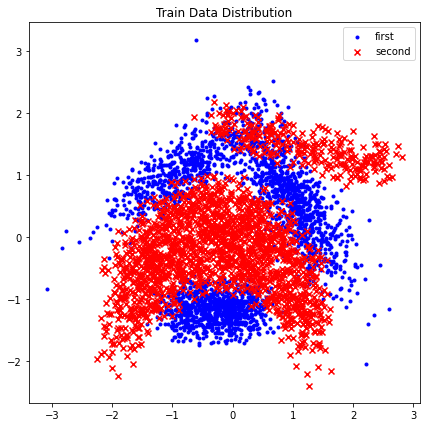

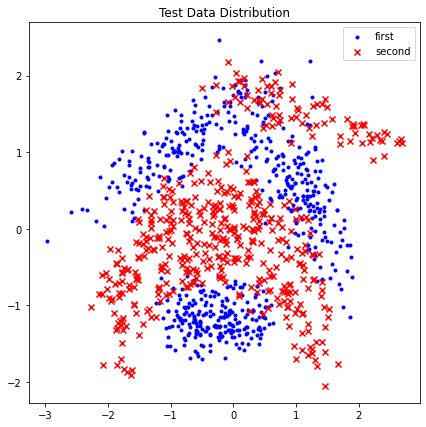

In [0]:
# scatter plot of with given points

plt.figure(figsize=(7,7))
plt.title('Train Data Distribution')


plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='b', marker=".", label='first')
plt.scatter(X_train[y_train==2,0], X_train[y_train==2,1], c='r', marker="x", label='second')
plt.legend(loc='upper right')

plt.figure(figsize=(7,7))
plt.title('Test Data Distribution')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], c='b', marker=".", label='first')
plt.scatter(X_test[y_test==2,0], X_test[y_test==2,1], c='r', marker="x", label='second')
plt.legend(loc='upper right')


Interactive Plot

In [0]:


plt.figure(figsize=(7,7))
k_widget=widgets.IntSlider(value=1,
    min=1,
    max=25,
    step=1,
    description='k',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')


choice_widget=widgets.Dropdown(
    options=['predefined', 'not predefined'],
    value='predefined',
    description='Choice:',
    disabled=False,
)

%time interact(knn,n_neighbors=k_widget,train_data=fixed(X_train),train_label=fixed(y_train),test_data=fixed(X_test),test_label=fixed(y_test),choice=choice_widget,continuous_update=False)

<Figure size 504x504 with 0 Axes>

interactive(children=(IntSlider(value=1, continuous_update=False, description='k', max=25, min=1), Dropdown(de…

CPU times: user 509 ms, sys: 112 ms, total: 621 ms
Wall time: 600 ms


<function __main__.knn>

#STATIC PLOTS

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: No contour levels were found within the data range.


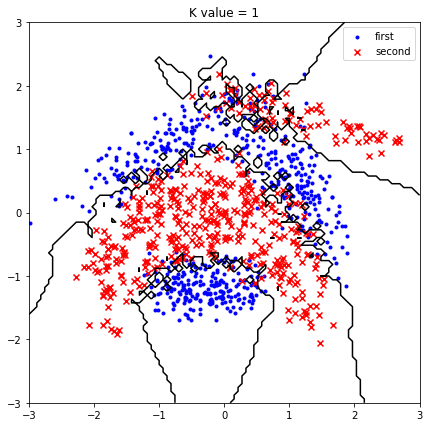

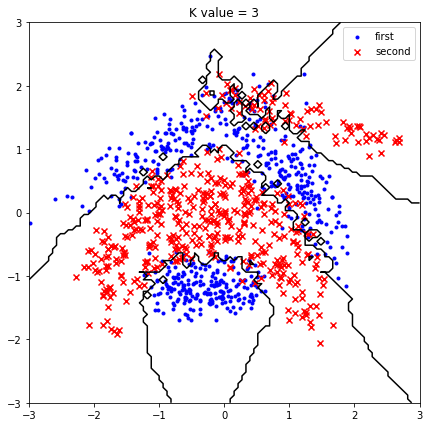

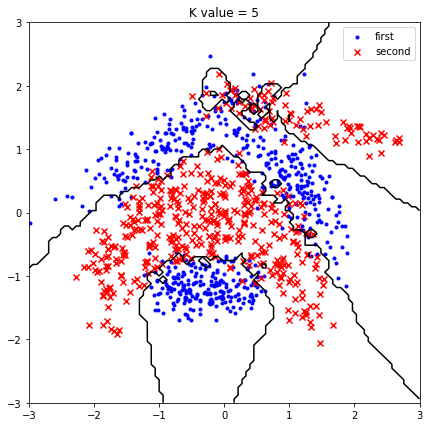

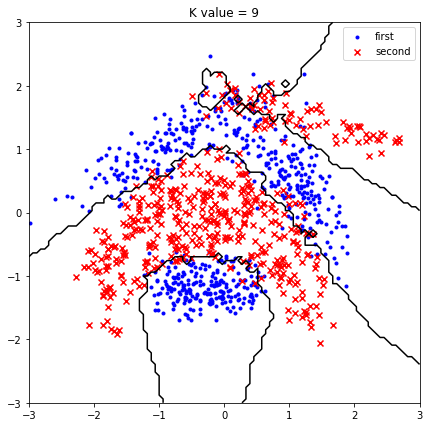

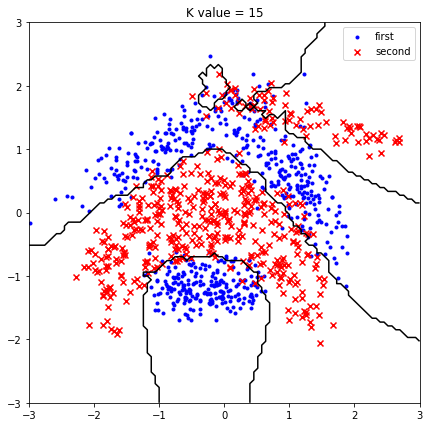

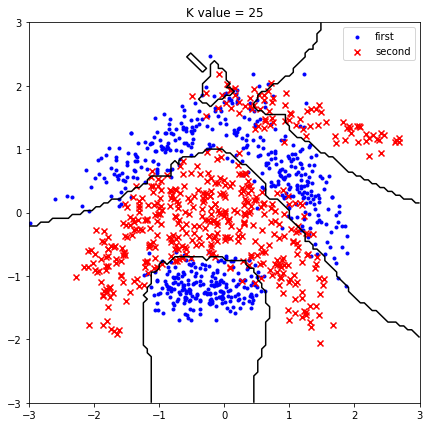

In [0]:
for k in [1, 3, 5, 9,15, 25]:
  knn(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,n_neighbors = k,choice='predefined')
  #Accuracy



#confusion_matrix(y_test, y_pred)
#print("Accuracy=")

Text(0.5, 1.0, 'Banana Data: Error Rate vs k')

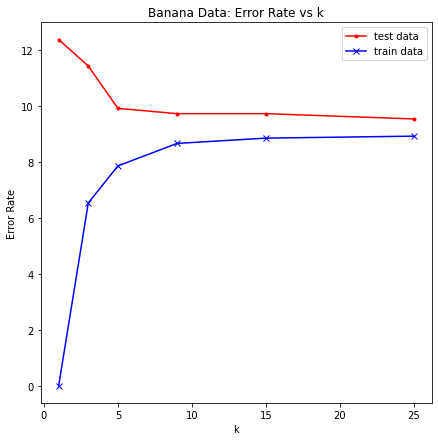

In [0]:
#Accuracy
plt.figure(figsize=(7,7))
k=[1, 3, 5, 9, 15, 25]
Accuracy_test=np.zeros(len(k))
for idx,k_value in enumerate(k):
  ypred=KNN(test_points=X_test,train_data=X_train,train_label=y_train,k=k_value)
  C_M=confusion_matrix(y_test, ypred)
  Accuracy_test[idx]=(C_M[0,1]+C_M[1,0])*100/np.sum(C_M)

Accuracy_train=np.zeros(len(k))

for idx,k_value in enumerate(k):
  ypred=KNN(test_points=X_train,train_data=X_train,train_label=y_train,k=k_value)
  C_M=confusion_matrix(y_train, ypred)
  Accuracy_train[idx]=(C_M[0,1]+C_M[1,0])*100/np.sum(C_M)
 

plt.plot(k,Accuracy_test,'.r-',label="test data")
plt.plot(k,Accuracy_train,'xb-',label="train data")
plt.legend(loc='upper right')
plt.ylabel('Error Rate')
plt.xlabel('k')
plt.title("Banana Data: Error Rate vs k")
 

 
